In [3]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.a2c_models as models

from pytorch_drl.algs.a2c import A2C

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## 1. Define Utils:

### 1.1 Plotting:

In [6]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[0]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

In [7]:
def copy_network(network1, network2):
    network2.load_state_dict(network1.state_dict())

## 2. Create environment

In [8]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 3. Define networks for different algorithms

In [9]:
a2c_model = models.A2CNetwork(state_size, action_size)

## 4. A2C Test

../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)


Trajectory 0, AVG. Loss 7.33
TEST at 0; score is 32.0
AVG score is 32.0
Trajectory 1, AVG. Loss 7.21
TEST at 1; score is 13.0
AVG score is 22.5
Trajectory 2, AVG. Loss 6.63
TEST at 2; score is 18.0
AVG score is 21.0
Trajectory 3, AVG. Loss 6.36
TEST at 3; score is 21.0
AVG score is 21.0
Trajectory 4, AVG. Loss 6.33
TEST at 4; score is 14.0
AVG score is 19.6
Trajectory 5, AVG. Loss 6.03
TEST at 5; score is 30.0
AVG score is 21.333333333333332
Trajectory 6, AVG. Loss 6.02
TEST at 6; score is 29.0
AVG score is 22.428571428571427
Trajectory 7, AVG. Loss 5.86
TEST at 7; score is 16.0
AVG score is 21.625
Trajectory 8, AVG. Loss 5.72
TEST at 8; score is 9.0
AVG score is 20.22222222222222
Trajectory 9, AVG. Loss 5.60
TEST at 9; score is 9.0
AVG score is 19.1
Trajectory 10, AVG. Loss 5.49
TEST at 10; score is 11.0
AVG score is 18.363636363636363
Trajectory 11, AVG. Loss 5.44
TEST at 11; score is 23.0
AVG score is 18.75
Trajectory 12, AVG. Loss 5.32
TEST at 12; score is 8.0
AVG score is 17.92307

TEST at 98; score is 41.0
AVG score is 17.343434343434343
Trajectory 99, AVG. Loss 4.56
TEST at 99; score is 17.0
AVG score is 17.34
Trajectory 100, AVG. Loss 4.55
TEST at 100; score is 14.0
AVG score is 17.16
Trajectory 101, AVG. Loss 4.54
TEST at 101; score is 31.0
AVG score is 17.34
Trajectory 102, AVG. Loss 4.61
TEST at 102; score is 14.0
AVG score is 17.3
Trajectory 103, AVG. Loss 4.66
TEST at 103; score is 11.0
AVG score is 17.2
Trajectory 104, AVG. Loss 4.68
TEST at 104; score is 27.0
AVG score is 17.33
Trajectory 105, AVG. Loss 4.73
TEST at 105; score is 30.0
AVG score is 17.33
Trajectory 106, AVG. Loss 4.80
TEST at 106; score is 41.0
AVG score is 17.45
Trajectory 107, AVG. Loss 4.83
TEST at 107; score is 84.0
AVG score is 18.13
Trajectory 108, AVG. Loss 4.92
TEST at 108; score is 19.0
AVG score is 18.23
Trajectory 109, AVG. Loss 4.95
TEST at 109; score is 57.0
AVG score is 18.71
Trajectory 110, AVG. Loss 5.02
TEST at 110; score is 25.0
AVG score is 18.85
Trajectory 111, AVG. L

TEST at 205; score is 50.0
AVG score is 36.9
Trajectory 206, AVG. Loss 15.93
TEST at 206; score is 21.0
AVG score is 36.7
Trajectory 207, AVG. Loss 15.98
TEST at 207; score is 12.0
AVG score is 35.98
Trajectory 208, AVG. Loss 15.99
TEST at 208; score is 39.0
AVG score is 36.18
Trajectory 209, AVG. Loss 16.11
TEST at 209; score is 19.0
AVG score is 35.8
Trajectory 210, AVG. Loss 16.15
TEST at 210; score is 15.0
AVG score is 35.7
Trajectory 211, AVG. Loss 16.16
TEST at 211; score is 30.0
AVG score is 35.77
Trajectory 212, AVG. Loss 16.16
TEST at 212; score is 28.0
AVG score is 35.86
Trajectory 213, AVG. Loss 16.18
TEST at 213; score is 25.0
AVG score is 35.82
Trajectory 214, AVG. Loss 16.14
TEST at 214; score is 18.0
AVG score is 35.87
Trajectory 215, AVG. Loss 16.13
TEST at 215; score is 98.0
AVG score is 36.65
Trajectory 216, AVG. Loss 16.22
TEST at 216; score is 19.0
AVG score is 36.13
Trajectory 217, AVG. Loss 16.19
TEST at 217; score is 23.0
AVG score is 35.93
Trajectory 218, AVG. L

TEST at 311; score is 155.0
AVG score is 49.1
Trajectory 312, AVG. Loss 11.85
TEST at 312; score is 60.0
AVG score is 49.42
Trajectory 313, AVG. Loss 11.77
TEST at 313; score is 16.0
AVG score is 49.33
Trajectory 314, AVG. Loss 11.88
TEST at 314; score is 99.0
AVG score is 50.14
Trajectory 315, AVG. Loss 11.83
TEST at 315; score is 122.0
AVG score is 50.38
Trajectory 316, AVG. Loss 11.64
TEST at 316; score is 128.0
AVG score is 51.47
Trajectory 317, AVG. Loss 11.56
TEST at 317; score is 36.0
AVG score is 51.6
Trajectory 318, AVG. Loss 11.56
TEST at 318; score is 182.0
AVG score is 53.12
Trajectory 319, AVG. Loss 11.45
TEST at 319; score is 200.0
AVG score is 54.91
Trajectory 320, AVG. Loss 11.46
TEST at 320; score is 95.0
AVG score is 55.59
Trajectory 321, AVG. Loss 11.35
TEST at 321; score is 25.0
AVG score is 55.68
Trajectory 322, AVG. Loss 11.44
TEST at 322; score is 46.0
AVG score is 55.78
Trajectory 323, AVG. Loss 11.39
TEST at 323; score is 200.0
AVG score is 57.58
Trajectory 324

Trajectory 417, AVG. Loss 10.34
TEST at 417; score is 38.0
AVG score is 69.42
Trajectory 418, AVG. Loss 10.36
TEST at 418; score is 31.0
AVG score is 67.91
Trajectory 419, AVG. Loss 10.77
TEST at 419; score is 26.0
AVG score is 66.17
Trajectory 420, AVG. Loss 11.66
TEST at 420; score is 19.0
AVG score is 65.41
Trajectory 421, AVG. Loss 11.98
TEST at 421; score is 30.0
AVG score is 65.46
Trajectory 422, AVG. Loss 12.26
TEST at 422; score is 20.0
AVG score is 65.2
Trajectory 423, AVG. Loss 13.10
TEST at 423; score is 20.0
AVG score is 63.4
Trajectory 424, AVG. Loss 13.29
TEST at 424; score is 25.0
AVG score is 62.65
Trajectory 425, AVG. Loss 13.75
TEST at 425; score is 27.0
AVG score is 61.34
Trajectory 426, AVG. Loss 14.77
TEST at 426; score is 33.0
AVG score is 59.67
Trajectory 427, AVG. Loss 15.15
TEST at 427; score is 36.0
AVG score is 58.13
Trajectory 428, AVG. Loss 15.44
TEST at 428; score is 48.0
AVG score is 56.81
Trajectory 429, AVG. Loss 15.61
TEST at 429; score is 44.0
AVG sco

TEST at 521; score is 200.0
AVG score is 136.11
Trajectory 522, AVG. Loss 15.55
TEST at 522; score is 183.0
AVG score is 137.74
Trajectory 523, AVG. Loss 14.69
TEST at 523; score is 133.0
AVG score is 138.87
Trajectory 524, AVG. Loss 14.48
TEST at 524; score is 116.0
AVG score is 139.78
Trajectory 525, AVG. Loss 14.38
TEST at 525; score is 125.0
AVG score is 140.76
Trajectory 526, AVG. Loss 13.36
TEST at 526; score is 136.0
AVG score is 141.79
Trajectory 527, AVG. Loss 12.96
TEST at 527; score is 132.0
AVG score is 142.75
Trajectory 528, AVG. Loss 12.91
TEST at 528; score is 157.0
AVG score is 143.84
Trajectory 529, AVG. Loss 12.73
TEST at 529; score is 115.0
AVG score is 144.55
Trajectory 530, AVG. Loss 13.05
TEST at 530; score is 121.0
AVG score is 145.37
Trajectory 531, AVG. Loss 12.03
TEST at 531; score is 144.0
AVG score is 146.44
Trajectory 532, AVG. Loss 11.84
TEST at 532; score is 145.0
AVG score is 147.58
Trajectory 533, AVG. Loss 11.35
TEST at 533; score is 115.0
AVG score is

Trajectory 624, AVG. Loss 15.49
TEST at 624; score is 200.0
AVG score is 160.1
Trajectory 625, AVG. Loss 15.57
TEST at 625; score is 200.0
AVG score is 160.85
Trajectory 626, AVG. Loss 15.56
TEST at 626; score is 200.0
AVG score is 161.49
Trajectory 627, AVG. Loss 15.55
TEST at 627; score is 200.0
AVG score is 162.17
Trajectory 628, AVG. Loss 15.25
TEST at 628; score is 200.0
AVG score is 162.6
Trajectory 629, AVG. Loss 15.56
TEST at 629; score is 200.0
AVG score is 163.45
Trajectory 630, AVG. Loss 14.96
TEST at 630; score is 200.0
AVG score is 164.24
Trajectory 631, AVG. Loss 14.95
TEST at 631; score is 200.0
AVG score is 164.8
Trajectory 632, AVG. Loss 14.94
TEST at 632; score is 200.0
AVG score is 165.35
Trajectory 633, AVG. Loss 14.93
TEST at 633; score is 200.0
AVG score is 166.2
Trajectory 634, AVG. Loss 14.93
TEST at 634; score is 200.0
AVG score is 166.92
Trajectory 635, AVG. Loss 14.92
TEST at 635; score is 200.0
AVG score is 167.39
Trajectory 636, AVG. Loss 15.04
TEST at 636;

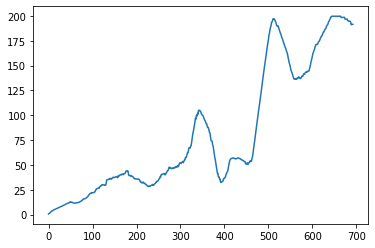

In [10]:
tmax = 5
n_traj = (20_000)//tmax
n_env = 16

a2c_model = models.A2CNetwork(state_size, action_size)

# init agent:
agent = A2C(a2c_model,
            env_name,
            n_env=n_env,
            lr=None,
            )
# train the agent
scores, losses = agent.train(tmax, n_traj,  env)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
#losses = mean_filter(losses, 50)
plt.plot(x, scores, label = "scores")
#plt.plot(x, losses, label = "losses")
#plt.legend()
plt.show()

### 4.1 Trained Agent Demonstration

In [60]:
tester.test_agent(agent, env, max_t=200, render=True, num_of_episodes=5, log=True)

20.0
15.0
36.0
41.0
18.0


## 5. A2C Continuous Test


### 5.1 Trained Agent Demonstration